ISRC Python Workshop: Network analysis

__Network Analysis with NetworkX__

---

@author: Zhiya Zuo

@email: zhiya-zuo@uiowa.edu

---

In [1]:
import numpy as np
import pandas as pd

---

#### Introduction

Network analysis, though well developed through the area of physics, has been deep in various research fields inclduing economics, finance, computer science, biology, etc. In this workshop, we will cover basics to <a href='https://networkx.github.io/documentation/stable/', target='_blank'>___NetworkX___</a>.

Before that, I here introduce two other popular Python packages: <a href='http://igraph.org/python/doc/tutorial/tutorial.html', target='_blank'>___iGraph___</a> and <a href='https://graph-tool.skewed.de/static/doc/index.html', target='_blank'>___graph-tool___</a>. Note that the installation of the latter may be painful but has trememdous speedup compared to the other two. (On Mac, you can easily use <a href='https://brew.sh/' target='_blank'>Homebrew</a> to isntall it!)

<div class="mark">
Note that in the following, I will use the term __graph__ and __network__ interchangeably.</div><i class="fa fa-lightbulb-o "></i>

##### Sample graph data

___NetworkX___ provides empirical network data for you to play with. We will be using <a href='https://en.wikipedia.org/wiki/Zachary%27s_karate_club' target='_blank'>Zachary's karate club</a> as an example here. 

_Note that if you have not installed __NetworkX__ yet, please run `pip install networkx` in your terminal to have it installed first_

In [2]:
# first import the library
import networkx as nx

In [3]:
# check the version of NetworkX
nx.__version__

'2.0'

In [4]:
G = nx.karate_club_graph()

`nx.info(G)` returns the basic description of the graph.

In [5]:
print nx.info(G)

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


We can save the graph as a <a href='https://en.wikipedia.org/wiki/Graph_Modelling_Language'>___GML___</a> file

In [6]:
nx.write_gml(G, 'sample-data/karate.gml')

##### Comparison of different libraries

###### NetworkX

In [7]:
G_nx = nx.read_gml('sample-data/karate.gml')
print nx.info(G_nx)

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [8]:
%timeit nx.closeness_centrality(G_nx)

100 loops, best of 3: 7.96 ms per loop


###### iGraph

In [9]:
import igraph as ig

In [10]:
G_ig = ig.load('sample-data/karate.gml')

In [11]:
print G_ig.summary()

IGRAPH U--- 34 78 -- 
+ attr: club (v), id (v), label (v)


In [12]:
%timeit G_ig.closeness()

10000 loops, best of 3: 128 µs per loop


###### graph-tool

In [13]:
import graph_tool.all as gt

In [14]:
G_gt = gt.load_graph('sample-data/karate.gml')

In [15]:
print G_gt

<Graph object, undirected, with 34 vertices and 78 edges at 0x11d0ff650>


In [16]:
%timeit gt.closeness(G_gt)

1000 loops, best of 3: 860 µs per loop


So we can see ___NetworkX___ is not very fast. However, it is noteworthy that the its well-written documents, ease of use, and all other features make it a very popular Python package for network analysis

---

#### Creating a network

##### Get a network from scratch

Let's start with a brute-force approach of building a network. This will give an emptive graph:

In [17]:
G = nx.Graph()
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



We can then start adding nodes/edges. 

_In some other areas, nodes are also called vertices; edges are called links._

In [18]:
G.add_node(1) # add one node at a time
print G.number_of_nodes()
G.add_nodes_from(range(2,5)) # add a list of nodes at once
print G.number_of_nodes()

1
4


While we have something in our network now, we do not have any connections between them. After all, connectivity is the most interesting thing in networks!

In [19]:
G.add_edge(1, 2) # add one edge at a time
print G.number_of_edges()
G.add_edges_from([(2, 3), (1, 4)]) # add a list of edges at once
print G.number_of_edges()

1
3


In [20]:
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000


We can now inspect what we have in our first network.

In [21]:
G.nodes()

NodeView((1, 2, 3, 4))

In [22]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 3)])

Degree is the number of connections a node has.

In [23]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 1, 4: 1})

<a id='sec22'></a>

##### Graph generators

Given specific parameters, we can ask __NetworkX__ to produce some ___random graphs___ for us. One of the use of random graphs is to compare the graph models to real data to see what are the differences/similarities between the two.

Reference:
> The Structure and Function of Complex Networks. M. E. J. Newman. SIAM Review 2003 45:2, 167-256

Let's say we will use ___karate club network__ as the real data.

In [24]:
karate = nx.karate_club_graph()

In [25]:
print nx.info(karate)

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


###### Erdos-Renyi random graph

This is a classic model for random graphs: given the number of nodes and probability of each possible edge formation, the model adds edges independently, also giving a tree like structure. 

In [35]:
n = karate.number_of_nodes() # number of nodes
p = 2.*karate.number_of_edges()/(n*n-1) # probability of edge creation (This is essentially the DENSITY of a network)

In [36]:
n, p

(34, 0.13506493506493505)

In [37]:
nx.density(karate)

0.13903743315508021

In [38]:
erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))

In [39]:
print nx.info(erdos_rg)

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 87
Average degree:   5.1176


###### Configuration model

This model helps to preserve a given degree distribution (i.e., the distribution of the number of connections each node has)

In [40]:
degree_dist = np.asarray(dict(karate.degree()).values())
degree_dist

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

In [41]:
conf_rg = nx.configuration_model(degree_dist, seed=np.random.randint(10))

In [42]:
print nx.info(conf_rg)

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


Note: a `MultiGraph` can contain different types of edges and self loops. We convert it back to `Graph`

In [43]:
conf_rg = nx.Graph(conf_rg)

In [44]:
print nx.info(conf_rg)

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 67
Average degree:   3.9412


###### More...

As we mentioned above, we can leverage ___NetworkX___'s built-in datasets as toy data for practice or even in your research or even in your research or even in your research or even in your research. See <a href='https://networkx.github.io/documentation/stable/reference/generators.html' target='_blank'>here</a> for more details.

---

#### Visualization

Personally, I don't like ___NetworkX___'s visualization. I suggest using: (i) <a href='http://igraph.org/r/' target='_blank'>iGraph in R</a>; (i) <a href='https://graph-tool.skewed.de/static/doc/draw.html' target='_blank'>graph-tool</a>; (iii) <a href='https://gephi.org/' target='_blank'>Gephi</a>, which are also easy to use and actually prettier. That said, we can still use __NetworkX__'s `draw` function to have a first taste of what our data looks like. Let's also use ___karate___ data for an example.

Note that we will need ___Matplotlib___ for visualization using ___NetworkX___. If you have not installed it, run `pip install matplotlib` in your terminal. If you use ___Anaconda__, you are good to go.

In [45]:
import matplotlib.pyplot as plt # import the dependent library

The following line is a notebook magic command to draw figures ___inline___.

In [46]:
%matplotlib inline

/Users/zhiyzuo/.virtualenvs/Zuo-Py/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


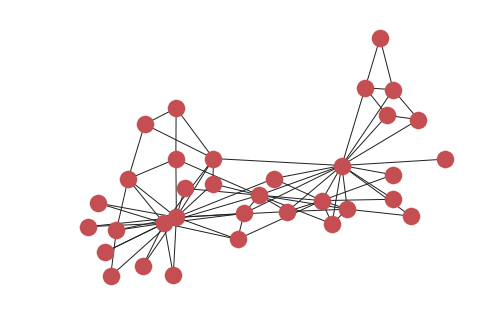

In [47]:
nx.draw(karate)

Not bad, right? But! We want to make it better, start by adding node labels.

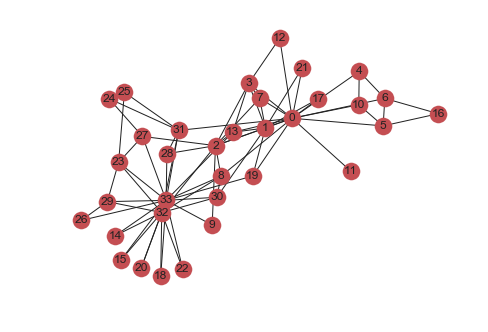

In [48]:
nx.draw(karate, with_labels=True)

We can choose what layouts we want: consult <a href='https://networkx.github.io/documentation/stable/reference/drawing.html' target='_blank'>here</a> for more information.

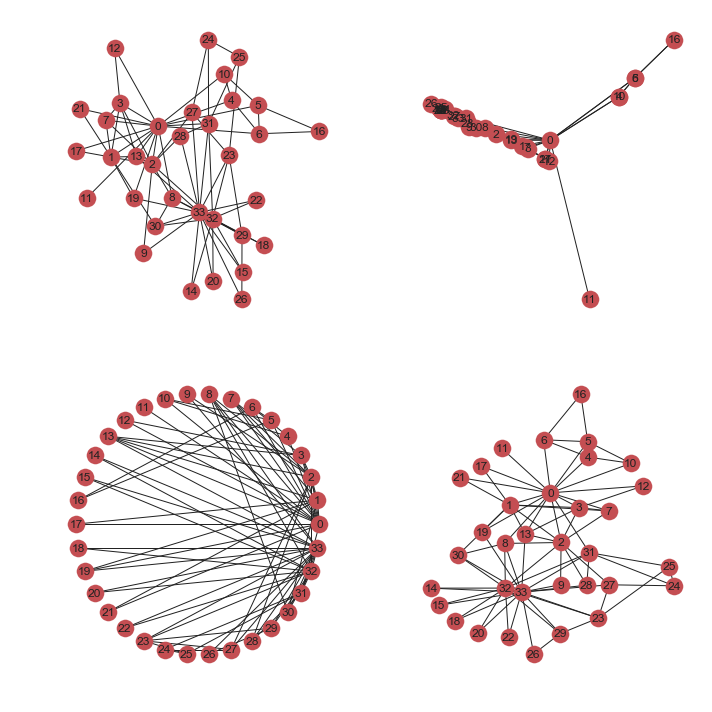

In [49]:
plt.figure(figsize=(10,10))
# plt.subplot() will create "sub-plots" in one canvas
# Now we are telling matplotlib to give us a 2x2 subplot canvas
plt.subplot(221)  # first subplot
nx.draw_spring(karate, with_labels=True)
plt.subplot(222) # second subplot
nx.draw_spectral(karate, with_labels=True)
plt.subplot(223) # third subplot
nx.draw_circular(karate, with_labels=True)
plt.subplot(224) # last subplot
nx.draw_kamada_kawai(karate, with_labels=True)

---

#### Network statistics

There are many useful functions to calculate network stats for you.

##### Global level stats

In [50]:
print 'Density:', nx.density(karate)

Density: 0.139037433155


In [51]:
print 'Avg. shortest path length:', nx.average_shortest_path_length(karate)

Avg. shortest path length: 2.40819964349


In [52]:
print 'Avg. clustering coefficient:', nx.average_clustering(karate)

Avg. clustering coefficient: 0.570638478208


In [53]:
print 'Assortativity', nx.degree_assortativity_coefficient(karate)

Assortativity -0.475613097685


Combining these with [Section 2.2](#sec22), we can play with some comparison between the synthesized and real network stats. A common routine is that we repeat the construction of random graphs over and over again to obtain the average values to decrease bias from the randomness.

Let's use `list` to save the stats:

In [54]:
erdos_assortativity_list = list()
conf_assortativity_list = list()

In [55]:
n = karate.number_of_nodes() # number of nodes
p = 2.*karate.number_of_edges()/(n*n-1) # probability of edge creation (This is essentially the DENSITY of a network)

In [56]:
degree_dist = np.asarray(dict(karate.degree()).values())
degree_dist

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

In [57]:
for i in range(100): # randomly sample random graphs 100 times
    erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))
    conf_rg = nx.Graph(nx.configuration_model(degree_dist, seed=np.random.randint(10))) # convert `MultiGraph` to `Graph`
    # calculate assortativity
    erdos_assortativity_list.append(nx.degree_assortativity_coefficient(erdos_rg))
    conf_assortativity_list.append(nx.degree_assortativity_coefficient(conf_rg))

In [58]:
print 'Erdos-Renyi assortativity:', np.mean(erdos_assortativity_list), np.std(erdos_assortativity_list, ddof=1)
print 'Conf. model assortativity:', np.mean(conf_assortativity_list), np.std(conf_assortativity_list, ddof=1)
print 'Real network value:', nx.degree_assortativity_coefficient(karate)

Erdos-Renyi assortativity: -0.0351248983264 0.0675420721161
Conf. model assortativity: -0.113929009133 0.07997084108
Real network value: -0.475613097685


Now you see that there's a much higher tendency of the low degree nodes (mostly members) in ___karate club network___ to connect with high degree nodes (mostly leaders). We can then interpret that there may be a core-periphery or leader-member structure. (_We cannot be sure about this from this very simple approach thought!_)

##### Local level

We can look at micro-level network stats by giving some nodes of interest.

In [59]:
karate.degree(1) # degree of one node

9

In [60]:
karate.degree([1,2]) # degree of a list of nodes

DegreeView({1: 9, 2: 10})

In [61]:
nx.shortest_path(karate, 1, 9) # one of the shortest path from node 1 to node 9

[1, 2, 9]

---

#### Conclusion

There are definitely a lot more to explore. In closing, I list a few topics that may be of high interest but cannot be covered due to time limit.

P.S.: <a href='https://icon.colorado.edu/#!/networks' target='_blank'>Index of Complex Networks</a> is a good place to find more network data.

---

##### PageRank

Ranking nodes based on various strategies is a common thing in measuring node importance. PageRank is one of the most successful one and has still been used in both the industry and academia. Usually, PageRank is applied in a __directed network__, where an edge has a direction. For example, webpage ___A___ has a link to webpage ___B___ but not the other way around. Therefore in the network of WWW, we only have $A\rightarrow B$ but NOT $B\rightarrow A$.

Reference: 
> Page, Lawrence and Brin, Sergey and Motwani, Rajeev and Winograd, Terry (1999) The PageRank Citation Ranking: Bringing Order to the Web. Technical Report. Stanford InfoLab.

###### Build network

Network data from http://tuvalu.santafe.edu/~aaronc/datacode.htm

In [62]:
edge_list = np.loadtxt('sample-data/terrorists/terrorist.pairs', dtype=str)
edge_list

array([['1', '5'],
       ['2', '5'],
       ['3', '5'],
       ['4', '5'],
       ['4', '7'],
       ['5', '1'],
       ['5', '2'],
       ['5', '3'],
       ['5', '4'],
       ['5', '6'],
       ['5', '7'],
       ['5', '8'],
       ['5', '9'],
       ['5', '10'],
       ['5', '11'],
       ['5', '32'],
       ['6', '5'],
       ['6', '10'],
       ['7', '4'],
       ['7', '5'],
       ['7', '8'],
       ['7', '10'],
       ['8', '5'],
       ['8', '7'],
       ['8', '11'],
       ['9', '5'],
       ['9', '10'],
       ['10', '5'],
       ['10', '6'],
       ['10', '7'],
       ['10', '9'],
       ['10', '13'],
       ['10', '23'],
       ['11', '5'],
       ['11', '8'],
       ['11', '12'],
       ['12', '11'],
       ['12', '22'],
       ['13', '10'],
       ['13', '14'],
       ['13', '18'],
       ['13', '22'],
       ['13', '23'],
       ['14', '13'],
       ['14', '18'],
       ['14', '19'],
       ['15', '18'],
       ['16', '18'],
       ['17', '18'],
       ['18', '13'],
   

In [63]:
node_name_dict = dict(np.loadtxt('sample-data/terrorists/terrorist.names', dtype=str))
node_name_dict

{'1': 'Samir_Kashk',
 '10': '\x03Tarek_Maaroufi',
 '11': 'Haydar_Abu_Doha',
 '12': 'Ahmed_Ressam',
 '13': 'Abu_Qatada',
 '14': 'Abu_Walid',
 '15': 'Jean-Marc_Grandvisir',
 '16': 'Abu_Zubeida',
 '17': 'Mizar_Trabelsi',
 '18': 'Djamal_Beghal',
 '19': 'Kamel_Daoudi',
 '2': 'Madjid_Sahoune',
 '20': 'Jerome_Courtaillier',
 '21': 'David_Courtaillier',
 '22': 'Zacarias_Moussaoui',
 '23': 'Imad_Eddin_Barakat_Yarkas',
 '24': 'Ramzi_Bin_al-Shibh',
 '25': 'Mohammed_Belfas',
 '26': 'Abdelghani_Mzoudi',
 '27': 'Ahmed_Khalil_Ibrahim_Samir_Al-Ani',
 '28': 'Mustafa_Ahmed_al-Hisawi',
 '29': 'Agus_Budiman',
 '3': 'Fahid_al_Shakri',
 '30': 'Mounir_El_Motassadeq',
 '31': 'Zakariya_Essabar',
 '32': 'Mohamed_Atta',
 '33': 'Fayez_Ahmed',
 '34': 'Mamduh_Mahmud_Salim',
 '35': 'Mamoun_Darkazanli',
 '36': 'Said_Bahaji',
 '37': 'Ziad_Jarrah',
 '38': 'Marwan_Al-Shehhi',
 '39': 'Wail_Alshehri',
 '4': 'Lased_Ben_Heni',
 '40': 'Waleed_Alshehri',
 '41': 'Mohand_Alshehri',
 '42': 'Satam_Suqami',
 '43': 'Abdul_Aziz_Al-O

Map names to name indices.

In [64]:
edge_list = [(node_name_dict[source], node_name_dict[target]) for source, target in edge_list]
edge_list

[('Samir_Kashk', 'Essid_Sami_Ben_Khemais'),
 ('Madjid_Sahoune', 'Essid_Sami_Ben_Khemais'),
 ('Fahid_al_Shakri', 'Essid_Sami_Ben_Khemais'),
 ('Lased_Ben_Heni', 'Essid_Sami_Ben_Khemais'),
 ('Lased_Ben_Heni', 'Mohamed_Bensakhria'),
 ('Essid_Sami_Ben_Khemais', 'Samir_Kashk'),
 ('Essid_Sami_Ben_Khemais', 'Madjid_Sahoune'),
 ('Essid_Sami_Ben_Khemais', 'Fahid_al_Shakri'),
 ('Essid_Sami_Ben_Khemais', 'Lased_Ben_Heni'),
 ('Essid_Sami_Ben_Khemais', 'Seifallah_ben_Hassine'),
 ('Essid_Sami_Ben_Khemais', 'Mohamed_Bensakhria'),
 ('Essid_Sami_Ben_Khemais', 'Mehdi_Khammoun'),
 ('Essid_Sami_Ben_Khemais', 'Essoussi_Laaroussi'),
 ('Essid_Sami_Ben_Khemais', '\x03Tarek_Maaroufi'),
 ('Essid_Sami_Ben_Khemais', 'Haydar_Abu_Doha'),
 ('Essid_Sami_Ben_Khemais', 'Mohamed_Atta'),
 ('Seifallah_ben_Hassine', 'Essid_Sami_Ben_Khemais'),
 ('Seifallah_ben_Hassine', '\x03Tarek_Maaroufi'),
 ('Mohamed_Bensakhria', 'Lased_Ben_Heni'),
 ('Mohamed_Bensakhria', 'Essid_Sami_Ben_Khemais'),
 ('Mohamed_Bensakhria', 'Mehdi_Khammoun'

In [65]:
terrorist_net = nx.DiGraph()
terrorist_net.name = 'terrorist network 911'
terrorist_net.add_edges_from(edge_list)
print nx.info(terrorist_net)

Name: terrorist network 911
Type: DiGraph
Number of nodes: 62
Number of edges: 304
Average in degree:   4.9032
Average out degree:   4.9032


In [66]:
nx.write_gml(terrorist_net, 'sample-data/terrorists/terrorist.gml')

###### Run PageRank

In [67]:
G = nx.read_gml('sample-data/terrorists/terrorist.gml')

In [68]:
print nx.info(G)

Name: terrorist network 911
Type: DiGraph
Number of nodes: 62
Number of edges: 304
Average in degree:   4.9032
Average out degree:   4.9032


$alpha=0.85$ is a commonly used dampling factor.

In [69]:
pr = nx.pagerank(G, alpha=0.85)

The returned value is a dictionary containing nodes and their __PageRank__ scores. Let's print them from high to low.

In [70]:
pr_df = pd.DataFrame([{'name': k, 'value': v} for k, v in pr.iteritems()])
pr_df.head()

,name,value
0,Raisal_Al_Salmi,0.007638
1,Nabil_al-Marabh,0.012521
2,Mamoun_Darkazanli,0.013733
3,Rayed_Mohammed_Abdullah,0.013663
4,Abdul_Aziz_Al-Omari,0.022920


In [71]:
pr_df.sort_values('value', ascending=False)

,name,value
45,Mohamed_Atta,0.060755
50,Essid_Sami_Ben_Khemais,0.047815
7,Marwan_Al-Shehhi,0.044991
13,Djamal_Beghal,0.036374
27,Hani_Hanjour,0.035418
61,Nawaf_Alhazmi,0.032473
42,Ramzi_Bin_al-Shibh,0.027930
58,Zacarias_Moussaoui,0.026033
5,Tarek_Maaroufi,0.024306
21,Ziad_Jarrah,0.023493


##### Community detection

Naturally, we want to know if there are groups/clusters of nodes in a network. Well seperated networks may indicate some emergent patterns within the nodes.

For simplicity, we will again use ___karate___

In [72]:
karate = nx.karate_club_graph()

There are several algorithms available in ___NetworkX___. Let us try the famous <a href=''https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman target='_blank'>Girvan–Newman method</a>.

Reference:
> Girvan M. and Newman M. E. J., Community structure in social and biological networks, Proc. Natl. Acad. Sci. USA 99, 7821–7826 (2002)

In [73]:
comm = list(nx.community.girvan_newman(karate))

It is a hierarchical partition. Let's get the 1st partition.

In [74]:
comm[0]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

We can now update our visualization by adding colors based on community partition. 

In [75]:
layout = nx.fruchterman_reingold_layout(karate) # positions for all nodes

We can realize this by plotting nodes seperately.

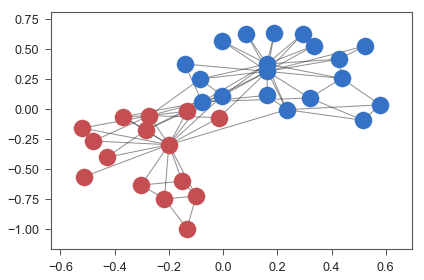

In [76]:
# 1st community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][0],
                       node_color='r')
# 2nd community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][1],
                       node_color='b')
# draw edges
nx.draw_networkx_edges(karate, layout, width=1.0, alpha=0.5)